In [1]:
import Preprocessing as pp
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
temp_data_folder = "../Data/Temp_Data/"
image_path = "../Images/"
image_subfolder = "Tries on Difference/"
image_folder = image_path + image_subfolder

pp.checkFolder(temp_data_folder)
pp.checkFolder(image_path)
pp.checkFolder(image_folder)

Folder already exists.
Folder already exists.
Folder already exists.


In [3]:
#colors
kit_green = '#009682'
kit_blue = '#4664AA'
kit_orange = '#DF9B1B'

In [4]:
df_1 = pp.openCSVFile('experiment_1.csv', temp_data_folder)
df_4b = pp.openCSVFile('experiment_4b.csv', temp_data_folder)
df_9 = pp.openCSVFile('experiment_9.csv', temp_data_folder)

In [5]:
timediff = 60
diff_1 = df_1.set_index('time').diff(timediff)
diff_4 = df_4b.set_index('time').diff(timediff)
diff_9 = df_9.set_index('time').diff(timediff)

In [6]:
def scale(train, test):
    scaler = MinMaxScaler(feature_range=(0,1))
    scaler = scaler.fit(train)
    
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    
    return scaler, train_scaled, test_scaled

In [7]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=5)

In [8]:
def fit_lstm(X_train, y_train, X_test, y_test, batch_size, nb_epoch, neurons):
    X, y = X_train, y_train
    X = X.reshape(X.shape[0], 1, X.shape[1])
    X_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=500, batch_size=batch_size, verbose=2, shuffle=False, validation_data=(X_t, y_test), callbacks = [es])
        model.reset_states()
    return model

In [9]:
y_train = diff_4['el_power']
X_train = df_4b['input_voltage']

y_test = diff_1['el_power']
X_test = df_1['input_voltage']

test = [X_test, y_test]
train = [X_train, y_train]

In [10]:
X_train = np.array(X_train[timediff:,])
X_test = np.array(X_test[timediff:,])
y_train = np.array(y_train[timediff:,])
y_test = np.array(y_test[timediff:,])

In [11]:
X_train, X_test = X_train.reshape(-1,1), X_test.reshape(-1,1)

In [12]:
scaler_X, X_train, X_test = scale(X_train.reshape(-1,1), X_test.reshape(-1,1))
scaler_y, y_train, y_test = scale(y_train.reshape(-1,1), y_test.reshape(-1,1))

In [13]:
el_maxi = diff_4.loc[diff_4.idxmax()['el_power']]['el_power']
el_mini = diff_4.loc[diff_4.idxmin()['el_power']]['el_power']

In [14]:
lstm_model = fit_lstm(X_train, y_train, X_test, y_test, 1, 50, 25)

Epoch 1/500
11230/11230 - 13s - loss: 0.0023 - val_loss: 0.0063
Epoch 2/500
11230/11230 - 13s - loss: 0.0011 - val_loss: 0.0060
Epoch 3/500
11230/11230 - 12s - loss: 0.0011 - val_loss: 0.0061
Epoch 4/500
11230/11230 - 13s - loss: 0.0012 - val_loss: 0.0061
Epoch 5/500
11230/11230 - 13s - loss: 0.0015 - val_loss: 0.0061
Epoch 6/500
11230/11230 - 13s - loss: 0.0016 - val_loss: 0.0061
Epoch 7/500
11230/11230 - 13s - loss: 0.0018 - val_loss: 0.0061
Epoch 00007: early stopping
Epoch 1/500
11230/11230 - 13s - loss: 0.0017 - val_loss: 0.0061
Epoch 2/500
11230/11230 - 14s - loss: 0.0018 - val_loss: 0.0061
Epoch 3/500
11230/11230 - 13s - loss: 0.0019 - val_loss: 0.0061
Epoch 4/500
11230/11230 - 14s - loss: 0.0019 - val_loss: 0.0061
Epoch 5/500
11230/11230 - 13s - loss: 0.0019 - val_loss: 0.0061
Epoch 6/500
11230/11230 - 13s - loss: 0.0020 - val_loss: 0.0061
Epoch 7/500
11230/11230 - 13s - loss: 0.0020 - val_loss: 0.0061
Epoch 8/500
11230/11230 - 13s - loss: 0.0020 - val_loss: 0.0061
Epoch 9/500


Epoch 2/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 3/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 4/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 5/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 6/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 7/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 8/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 9/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 10/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 11/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 12/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 13/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 14/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 15/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 16/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 17/500
11230/11230 - 15s - 

Epoch 5/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 6/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 00006: early stopping
Epoch 1/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 2/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 3/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 4/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 5/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 6/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 00006: early stopping
Epoch 1/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 2/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 3/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 4/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 5/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 6/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 00006: early stopping
Epoch 1/500
11230/11

Epoch 72/500
11230/11230 - 16s - loss: 0.0020 - val_loss: 0.0061
Epoch 73/500
11230/11230 - 16s - loss: 0.0020 - val_loss: 0.0061
Epoch 74/500
11230/11230 - 16s - loss: 0.0020 - val_loss: 0.0061
Epoch 75/500
11230/11230 - 16s - loss: 0.0020 - val_loss: 0.0061
Epoch 76/500
11230/11230 - 16s - loss: 0.0020 - val_loss: 0.0061
Epoch 77/500
11230/11230 - 16s - loss: 0.0020 - val_loss: 0.0061
Epoch 78/500
11230/11230 - 16s - loss: 0.0020 - val_loss: 0.0061
Epoch 79/500
11230/11230 - 16s - loss: 0.0020 - val_loss: 0.0061
Epoch 80/500
11230/11230 - 16s - loss: 0.0020 - val_loss: 0.0061
Epoch 81/500
11230/11230 - 16s - loss: 0.0020 - val_loss: 0.0061
Epoch 82/500
11230/11230 - 17s - loss: 0.0020 - val_loss: 0.0061
Epoch 83/500
11230/11230 - 17s - loss: 0.0020 - val_loss: 0.0061
Epoch 84/500
11230/11230 - 16s - loss: 0.0020 - val_loss: 0.0061
Epoch 85/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 86/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 87/500
11230/11230 

Epoch 20/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 21/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 00021: early stopping
Epoch 1/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 2/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 3/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 4/500
11230/11230 - 14s - loss: 0.0020 - val_loss: 0.0061
Epoch 5/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 6/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 7/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 8/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 00008: early stopping
Epoch 1/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 2/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 3/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 4/500
11230/11230 - 15s - loss: 0.0020 - val_loss: 0.0061
Epoch 5/500
11230/11230 - 15s - loss: 0.0020 -

In [15]:
sc = MinMaxScaler(feature_range= (el_mini, el_maxi))
sc.fit(y_test)

MinMaxScaler(feature_range=(-830.0, 968.0))

In [16]:
X_test_reshaped = X_test[:, 0].reshape(len(X_test), 1, 1)
pred = lstm_model.predict(X_test_reshaped, batch_size=1)

In [17]:
predictions = sc.transform(pred)
y_test_true = sc.transform(y_test)

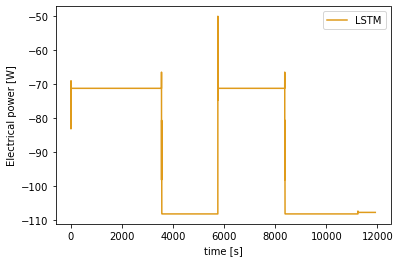

In [18]:
import time
timestr = time.strftime("%Y-%m-%d_%H-%M")
#pyplot.plot(y_test_true[300:-500], label = 'true', color = kit_blue)
pyplot.plot(predictions, label = 'LSTM', color = kit_orange)

pyplot.legend()
pyplot.ylabel('Electrical power [W]')
pyplot.xlabel('time [s]')

pyplot.savefig(image_folder + timestr + '_ex4_LSTM_electric.svg')
pyplot.savefig(image_folder + timestr + '_ex4_LSTM_electric.png')
pyplot.show()